Step 1: Ask****

For the business objective of this case study, the central aim is to devise marketing strategies that are adept at transforming casual riders into annual members by leveraging the power of data analytics. The focus is to deeply understand user patterns and preferences from historical bike trip data to drive highly targeted marketing campaigns. The ultimate intention is to enhance the company's profitability and support its continued growth trajectory.

Analytical Responsibilities

* Conduct a thorough examination of Cyclistic’s historical bike trip data.
* Identify and interpret usage trends and patterns differentiating casual from member riders.
* Investigate the unique behaviors and preferences of these two distinct rider groups.
* Pinpoint specific moments where targeted marketing can effectively encourage casual riders to become members.
* Utilize these insights to develop a data-driven, innovative marketing strategy for Cyclistic.
* Aim to improve financial returns and foster the company's development.

Stakeholders Involved

* Lily Moreno, the Marketing Director at Cyclistic, who oversees the implementation of marketing initiatives.
* The marketing analytics team at Cyclistic, responsible for the data analysis and the creation of the marketing strategy.
* Casual riders at Cyclistic, who are the primary target of the marketing campaign and whose behaviors will be scrutinized.
* Annual members at Cyclistic, who serve as the model for converting casual riders.
* Investors and shareholders of Cyclistic, who have a vested interest in the company's profitability and the success of its marketing strategies.

Step 2: Prepare****

Data Accessibility:
The data set for this study is composed of historical trip data from Cyclistic’s operational records.

Data Provenance:
The data originates from Cyclistic's internal systems and has been provided by Motivate International Inc., adhering to a defined licensing agreement that governs its use.

Data Structure:
The data is organized into monthly CSV files covering a full calendar year from January to December 2022. It comprises 13 distinct columns detailing a range of trip attributes.

Data Quality Assessment (ROCCC):
* Reliability: The data’s reliability has not been formally established and warrants verification.
* Originality: The data's originality has not been independently confirmed.
* Comprehensiveness: The data set is comprehensive, including critical variables such as trip duration, user type, gender, and station information, which are essential for the intended trend analysis.
* Currency: The data is current, with records spanning from 2013 to 2022.
* Citation: Details regarding the data citation are not disclosed.

Data Ethics and Governance:
The data set has been anonymized to remove personally identifiable information in compliance with data privacy standards. This level of anonymization limits the scope of analysis, particularly in terms of identifying repeat casual users or verifying their locality in relation to the service area.

Data Utilization for Strategic Planning:
The analysis aims to discern behavioral patterns between casual and member users to develop a strategic plan that persuades casual riders to convert to full membership.

Data Integration and Cleaning:
A unified data set is required from the 12 individual monthly files to conduct a streamlined analysis. This process involves the elimination of extraneous variables, along with the correction of errors and removal of duplicate entries to maintain the integrity of the data set.

Step 3: Process****

In [1]:
library(tidyverse) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(lubridate)

In [3]:
library(dplyr)

In [4]:
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [5]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [6]:
library(readr)

In [7]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [8]:
library(hrbrthemes)

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [9]:
library(ggplot2)

In [10]:
trip_202201 <- read.csv("/kaggle/input/cyclistic/202201-divvy-tripdata.csv")
trip_202202 <- read.csv("/kaggle/input/cyclistic/202202-divvy-tripdata.csv")
trip_202203 <- read.csv("/kaggle/input/cyclistic/202203-divvy-tripdata.csv")
trip_202204 <- read.csv("/kaggle/input/cyclistic/202204-divvy-tripdata.csv")
trip_202205 <- read.csv("/kaggle/input/cyclistic/202205-divvy-tripdata.csv")
trip_202206 <- read.csv("/kaggle/input/cyclistic/202206-divvy-tripdata.csv")
trip_202207 <- read.csv("/kaggle/input/cyclistic/202207-divvy-tripdata.csv")
trip_202208 <- read.csv("/kaggle/input/cyclistic/202208-divvy-tripdata.csv")
trip_202209 <- read.csv("/kaggle/input/cyclistic/202209-divvy-publictripdata.csv")
trip_202210 <- read.csv("/kaggle/input/cyclistic/202210-divvy-tripdata.csv")
trip_202211 <- read.csv("/kaggle/input/cyclistic/202211-divvy-tripdata.csv")
trip_202212 <- read.csv("/kaggle/input/cyclistic/202212-divvy-tripdata.csv")

In [11]:
colnames(trip_202201)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [12]:
colnames(trip_202202)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [13]:
colnames(trip_202203)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [14]:
colnames(trip_202204)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [15]:
colnames(trip_202205)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [16]:
colnames(trip_202206)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [17]:
colnames(trip_202207)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [18]:
colnames(trip_202208)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [19]:
colnames(trip_202209)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [20]:
colnames(trip_202210)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [21]:
colnames(trip_202211)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [22]:
colnames(trip_202212)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [23]:
##Combine All Data 
data_trips <- bind_rows(trip_202201,trip_202202,trip_202203,trip_202204,trip_202205,trip_202206,trip_202207,trip_202208,trip_202209,trip_202210,trip_202211,trip_202212)

In [24]:
#Remove data was dropped beginning
data_trips <- data_trips %>%
  select(-c(start_lat, start_lng, end_lat, end_lng))

In [25]:
#Check new data after the combination
#Column name
colnames(data_trips) 

[1] "ride_id"            "rideable_type"      "started_at"        
[4] "ended_at"           "start_station_name" "start_station_id"  
[7] "end_station_name"   "end_station_id"     "member_casual"

In [26]:
#How many rows
nrow(data_trips)

[1] 5667717

In [27]:
#Dimensions
dim(data_trips)

[1] 5667717       9

In [28]:
#First 6 rows 
head(data_trips)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,casual
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,member
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,casual
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,member
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,member


In [29]:
#Last 6 rows
tail(data_trips)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5667712,7BDEDE9860418B53,classic_bike,2022-12-07 06:52:45,2022-12-07 06:56:36,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,member
5667713,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,member
5667714,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,member
5667715,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,member
5667716,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,member
5667717,2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:35:28,Southport Ave & Waveland Ave,13235,Seeley Ave & Roscoe St,13144,casual


In [30]:
#List of columns and data types (numeric, character, etc)
str(data_trips)

'data.frame':	5667717 obs. of  9 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ member_casual     : chr  "casual" "casual" "member" "casual" ...


In [31]:
#Statistical summary
summary(data_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 member_casual     
 Length:5667717    
 Class :character  
 Mode  :character  

In [32]:
#Remove data where started_at is greater than ended_at
data_trips <- data_trips %>%
  filter(started_at < ended_at)

In [33]:
#Remove duplicates
data_trips <- distinct(data_trips)

In [34]:
#Separate date in date, day, month, year for better analysis
data_trips$date <- as.Date(data_trips$started_at) #The default format is yyyy-mm-dd
data_trips$month <- format(as.Date(data_trips$date), "%m")
data_trips$day <- format(as.Date(data_trips$date), "%d")
data_trips$year <- format(as.Date(data_trips$date), "%Y")
data_trips$day_of_week <- format(as.Date(data_trips$date), "%A")

In [35]:
#Add ride length column
data_trips$ride_length <- difftime(data_trips$ended_at, data_trips$started_at)

In [36]:
#Inspect the structure of the columns
str(data_trips)

'data.frame':	5667186 obs. of  15 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ member_casual     : chr  "casual" "casual" "member" "casual" ...
 $ date 

In [37]:
#Convert “ride_length” from Factor to numeric
data_trips$ride_length <- as.numeric(as.character(data_trips$ride_length))

In [38]:
#Remove “bad” data
clean_data_trips <- data_trips[!data_trips$ride_length<0,]

In [39]:
#Save the clean data
write.csv(clean_data_trips,"data\\clean_data_trips.csv",row.names = FALSE)

Step 4: Analyze****

In [40]:
#Descriptive Analysis
#Analysis:- min, max, median, average
summary(clean_data_trips$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     349     617    1167    1108 2483235 

In [41]:
#Compare members and casual users
aggregate(clean_data_trips$ride_length ~ clean_data_trips$member_casual, FUN = mean)

clean_data_trips$member_casual,clean_data_trips$ride_length
<chr>,<dbl>
casual,1748.9000
member,762.8915


In [42]:
aggregate(clean_data_trips$ride_length ~ clean_data_trips$member_casual, FUN = median)

clean_data_trips$member_casual,clean_data_trips$ride_length
<chr>,<dbl>
casual,780
member,530


In [43]:
aggregate(clean_data_trips$ride_length ~ clean_data_trips$member_casual, FUN = max)

clean_data_trips$member_casual,clean_data_trips$ride_length
<chr>,<dbl>
casual,2483235
member,93594


In [44]:
aggregate(clean_data_trips$ride_length ~ clean_data_trips$member_casual, FUN = min)

clean_data_trips$member_casual,clean_data_trips$ride_length
<chr>,<dbl>
casual,1
member,1


In [45]:
clean_data_trips$day_of_week <- ordered(clean_data_trips$day_of_week, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [46]:
aggregate(clean_data_trips$ride_length ~ clean_data_trips$member_casual + clean_data_trips$day_of_week, FUN = mean)

clean_data_trips$member_casual,clean_data_trips$day_of_week,clean_data_trips$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2043.6343
member,Sunday,841.9355
casual,Monday,1751.3805
member,Monday,736.2531
casual,Tuesday,1549.5189
member,Tuesday,727.8171
casual,Wednesday,1485.1319
member,Wednesday,726.3364
casual,Thursday,1533.0238


In [47]:
#Average duration sorted by rider type, then day of the week
clean_data_trips %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_ride = n(),
            avgerage_duration = mean(ride_length),
            median_duration = median(ride_length),
            max_duration = max(ride_length),
            min_duration = min(ride_length))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,number_of_ride,avgerage_duration,median_duration,max_duration,min_duration
<chr>,<ord>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
casual,Sunday,388981,2043.6343,901,2175468,1
casual,Monday,277649,1751.3805,772,1922127,1
casual,Tuesday,263706,1549.5189,692,1865151,1
casual,Wednesday,274339,1485.1319,686,2149238,1
casual,Thursday,309297,1533.0238,705,1861410,1
casual,Friday,334667,1682.8110,748,1944178,1
casual,Saturday,473130,1957.0725,898,2483235,1
member,Sunday,387180,841.9355,573,89997,1
member,Monday,473305,736.2531,507,89997,1


In [48]:
clean_data_trips_viz <- clean_data_trips %>% 
  select(rideable_type, started_at, ended_at, start_station_name, end_station_name, member_casual, month, day, year, day_of_week, ride_length)

write.csv(clean_data_trips_viz,"data\\clean_data_trips_viz.csv",row.names = FALSE)

Step 5: Share****

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


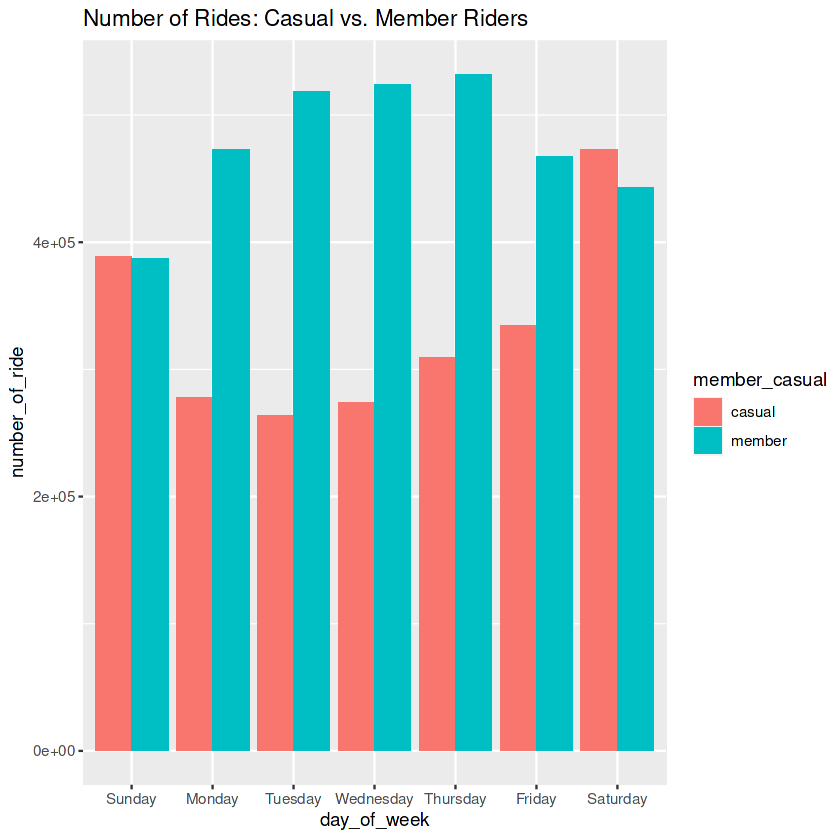

In [49]:
#Number of Rides: Casual vs. Member Riders - Viz 1
clean_data_trips %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_ride = n(),
            avgerage_duration = mean(ride_length))%>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_ride, fill = member_casual)) +
  geom_col(position = "dodge") + 
  labs(title = "Number of Rides: Casual vs. Member Riders")

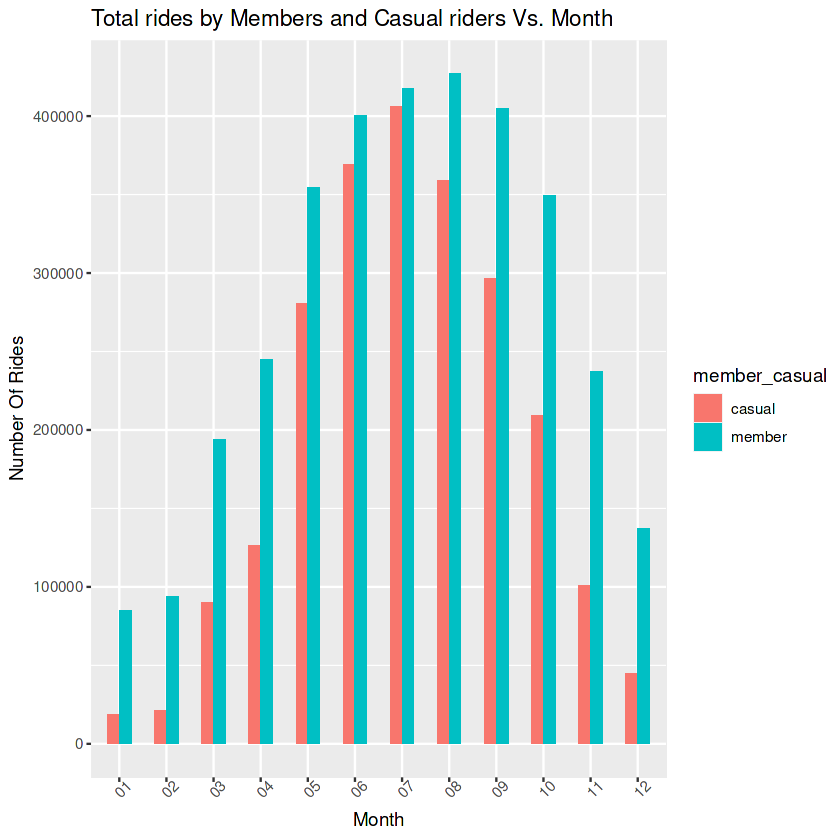

In [50]:
#Total rider by Members and Casual riders vs. Month - Viz 2
clean_data_trips %>%  
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n(),
            avgerage_duration = mean(ride_length),.groups="drop") %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total rides by Members and Casual riders Vs. Month", x = "Month", y= "Number Of Rides") +
  theme(axis.text.x = element_text(angle = 45)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

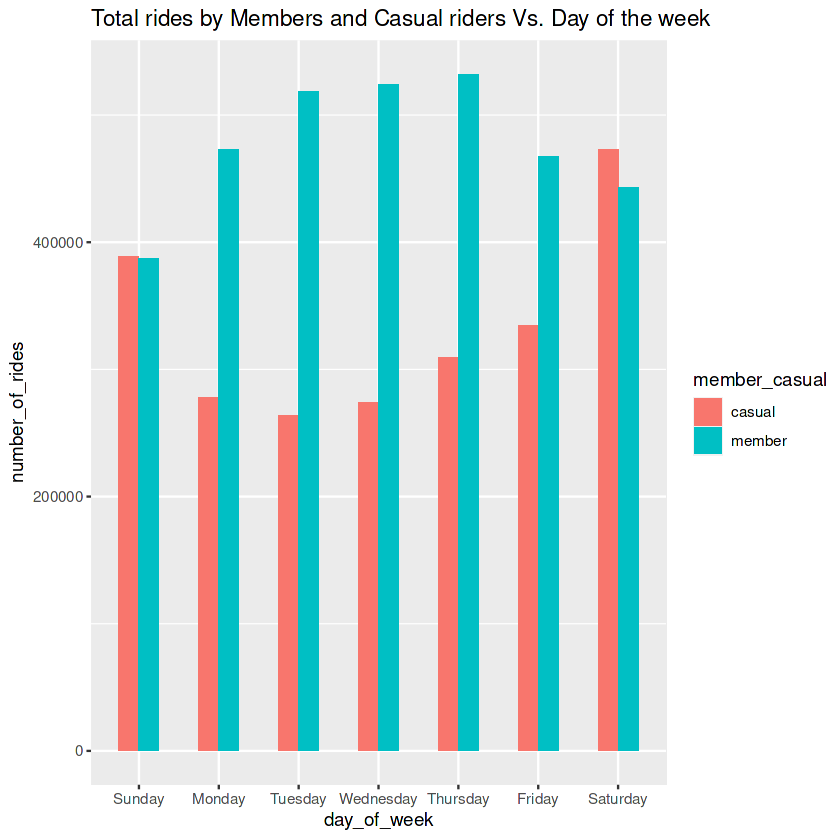

In [51]:
#Total rides by Members and Casual riders vs. Day of the week - Viz 3
clean_data_trips %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(), .groups="drop") %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total rides by Members and Casual riders Vs. Day of the week") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

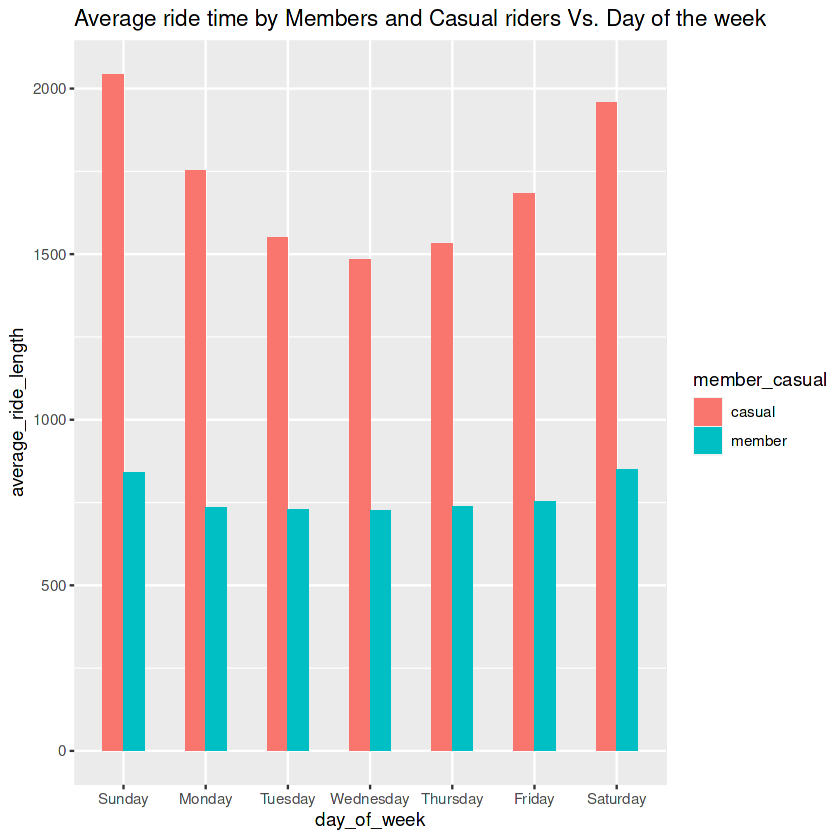

In [52]:
#Average ride time by Members and Casual riders Vs. Day of the week - Viz 4
clean_data_trips %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(average_ride_length = mean(ride_length), .groups="drop") %>%
  ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average ride time by Members and Casual riders Vs. Day of the week")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


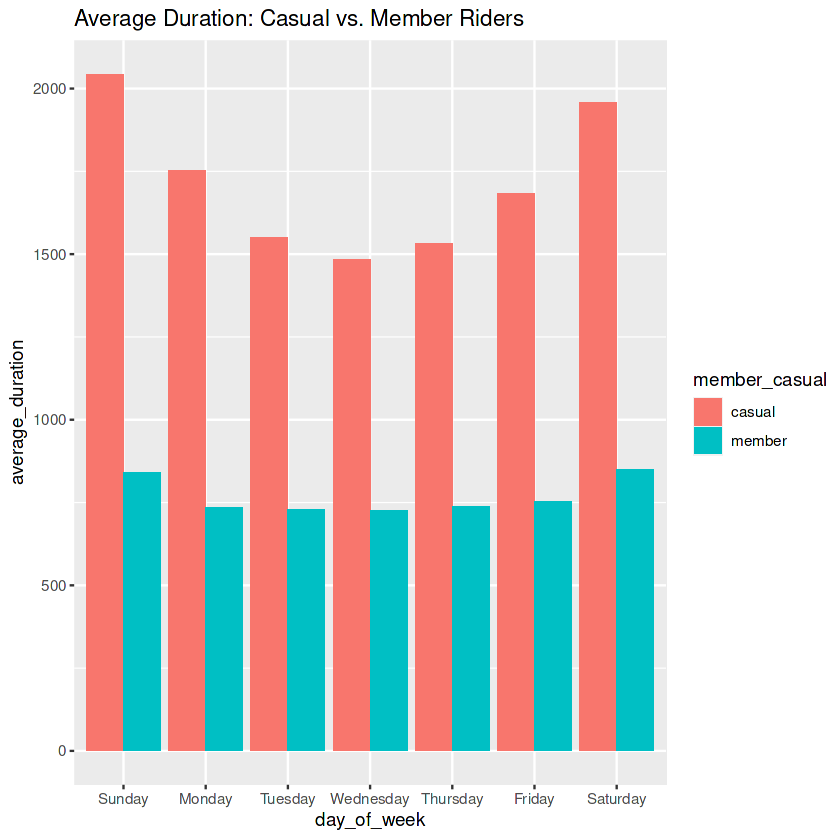

In [53]:
#Average Duration: Casual vs. Member Riders - Viz 5
clean_data_trips %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_ride = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual,day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
    labs(title = "Average Duration: Casual vs. Member Riders")

Step 6: Act****

Based on the visualizations reflecting bike usage patterns, here are some specific strategies that Cyclistic can employ to convert casual riders into members:

* Weekend Adventure Membership: Offer a tailored membership for casual riders who predominantly use bikes on weekends. This plan could include benefits such as reduced rates for weekend trips, exclusive weekend-only bikes, or reward points that accumulate during weekend use. Additionally, collaborate with local businesses to provide discounts or perks at weekend destinations, encouraging leisure usage among casual riders.
* Seasonal Surge Promotions: Introduce a seasonal membership promotion during the peak months of spring and summer when bike usage spikes. This campaign could offer a discounted rate for a limited time, enticing casual riders to try out the membership during the months they're most likely to ride.
* Commuter Conversion Incentives: Since members tend to use bikes consistently on weekdays, possibly for commuting, Cyclistic could introduce a 'Commuter Club' membership with perks such as guaranteed bike availability during rush hours, discounted rates for frequent weekday use, or a partnership with local transit for combined transportation options.
* Long-Ride Loyalty Benefits: Casual riders tend to take longer rides, particularly on weekends. Cyclistic can capitalize on this by introducing a loyalty program that rewards longer rides with points that can be redeemed for free rides or membership discounts. This encourages extended usage and provides an incentive for casual riders to become members.
* Digital Engagement Drives: Given the potential influence of digital media, Cyclistic can launch targeted online campaigns that highlight stories of casual riders converting to members, possibly showcasing the cost savings and other benefits gained over time. Interactive social media challenges or digital badges for ride milestones could also engage casual riders and foster a sense of community.
* Exclusive Member Events: Organize members-only rides or events, such as scenic tours or cycling classes, that are available exclusively to members or at a discounted rate. Advertise these events as premium experiences that casual riders can access by becoming members.
* Data-Driven Bike Upgrades: Utilize ride length data to offer casual riders the opportunity to try out higher-end bikes as a member-exclusive perk. This could attract those casual riders who take longer trips and would appreciate more comfortable or performance-oriented bikes.

By implementing these strategies, Cyclistic can tailor their offerings to match the behaviors and preferences revealed by the data, providing a compelling value proposition that can convert casual riders into loyal members.